In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
# for data visualisation and statistical analysis
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
df = pd.read_csv('cars_sample-modified.csv')

In [57]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,17/03/2016 15:47,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,private,offer,3200,test,station wagon,2006,manual,109,focus,150000,7,diesel,ford,no,17/03/2016 0:00,44534,17/03/2016 15:47
1,03/04/2016 21:47,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,private,offer,30900,test,limousine,2015,automatic,175,6_reihe,20000,6,diesel,mazda,no,03/04/2016 0:00,63808,05/04/2016 22:47
2,23/03/2016 1:57,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,private,offer,1600,test,limousine,1998,manual,101,NaN,100000,8,petrol,opel,no,23/03/2016 0:00,24983,07/04/2016 4:46
3,24/03/2016 13:39,Volkswagen_Polo_60_Servo,private,offer,999,control,small car,1996,automatic,60,polo,125000,12,petrol,volkswagen,no,24/03/2016 0:00,32049,07/04/2016 4:45
4,09/03/2016 23:44,A_Klasse_nicht_fahrbereit,private,offer,400,test,small car,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,yes,09/03/2016 0:00,72762,14/03/2016 5:44


In [58]:
df = df.drop(columns=['lastSeen', 'postalCode', 'dateCreated','dateCrawled'])

In [59]:
df

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,private,offer,3200,test,station wagon,2006,manual,109,focus,150000,7,diesel,ford,no
1,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,private,offer,30900,test,limousine,2015,automatic,175,6_reihe,20000,6,diesel,mazda,no
2,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,private,offer,1600,test,limousine,1998,manual,101,NaN,100000,8,petrol,opel,no
3,Volkswagen_Polo_60_Servo,private,offer,999,control,small car,1996,automatic,60,polo,125000,12,petrol,volkswagen,no
4,A_Klasse_nicht_fahrbereit,private,offer,400,test,small car,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,yes
5,Ford_Ka__2001__Klima__Servo.,private,offer,599,control,small car,2001,manual,60,ka,150000,6,petrol,ford,no
6,Tausche_signum_2.2_direkt_gegen_Diesel,private,offer,3899,control,station wagon,2003,manual,155,signum,80000,5,NaN,opel,no
7,Mercedes_Benz_W210_E200_T_Modell_Classic_in_weiss,private,offer,750,test,station wagon,1997,manual,0,e_klasse,150000,5,petrol,mercedes_benz,NaN
8,Volkswagen_Bora_Variant_2.0_Comfortline,private,offer,1650,control,station wagon,2000,manual,116,bora,150000,1,petrol,volkswagen,no
9,Mercedes_Benz_GLK_250_CDI_DPF_4Matic_XENON_PAN...,private,offer,19900,test,suv,2011,automatic,204,glk,125000,3,diesel,mercedes_benz,no


In [60]:
df.isnull().sum()

name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5130
yearOfRegistration        0
gearbox                2663
powerPS                   0
model                  2668
kilometer                 0
monthOfRegistration       0
fuelType               4456
brand                     0
notRepairedDamage      9772
dtype: int64

In [61]:
df.mode()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,BMW_318i,private,offer,0,test,limousine,2000,manual,0,golf,150000,0,petrol,volkswagen,no


In [62]:
df['vehicleType'] = df['vehicleType'].fillna((df['vehicleType'].mode()[0]))
df['gearbox'] = df['gearbox'].fillna((df['gearbox'].mode()[0]))
df['model'] = df['model'].fillna((df['model'].mode()[0]))
df['fuelType'] = df['fuelType'].fillna((df['fuelType'].mode()[0]))
df['notRepairedDamage'] = df['notRepairedDamage'].fillna((df['notRepairedDamage'].mode()[0]))

In [63]:
df

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,private,offer,3200,test,station wagon,2006,manual,109,focus,150000,7,diesel,ford,no
1,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,private,offer,30900,test,limousine,2015,automatic,175,6_reihe,20000,6,diesel,mazda,no
2,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,private,offer,1600,test,limousine,1998,manual,101,golf,100000,8,petrol,opel,no
3,Volkswagen_Polo_60_Servo,private,offer,999,control,small car,1996,automatic,60,polo,125000,12,petrol,volkswagen,no
4,A_Klasse_nicht_fahrbereit,private,offer,400,test,small car,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,yes
5,Ford_Ka__2001__Klima__Servo.,private,offer,599,control,small car,2001,manual,60,ka,150000,6,petrol,ford,no
6,Tausche_signum_2.2_direkt_gegen_Diesel,private,offer,3899,control,station wagon,2003,manual,155,signum,80000,5,petrol,opel,no
7,Mercedes_Benz_W210_E200_T_Modell_Classic_in_weiss,private,offer,750,test,station wagon,1997,manual,0,e_klasse,150000,5,petrol,mercedes_benz,no
8,Volkswagen_Bora_Variant_2.0_Comfortline,private,offer,1650,control,station wagon,2000,manual,116,bora,150000,1,petrol,volkswagen,no
9,Mercedes_Benz_GLK_250_CDI_DPF_4Matic_XENON_PAN...,private,offer,19900,test,suv,2011,automatic,204,glk,125000,3,diesel,mercedes_benz,no


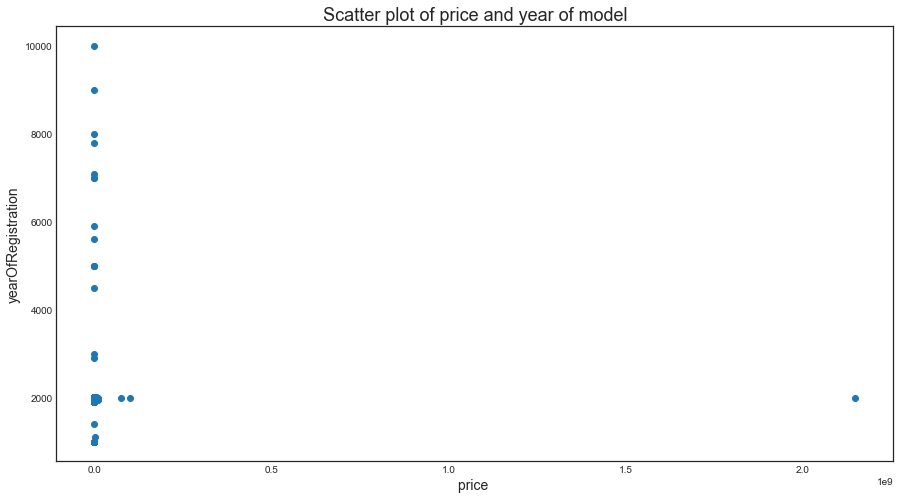

In [64]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.price, df.yearOfRegistration)
plt.xlabel("price ", fontsize=14)
plt.ylabel("yearOfRegistration", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

In [65]:
df = df.drop(columns=['name', 'seller', 'offerType','abtest','monthOfRegistration'])

In [66]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,3200,station wagon,2006,manual,109,focus,150000,diesel,ford,no
1,30900,limousine,2015,automatic,175,6_reihe,20000,diesel,mazda,no
2,1600,limousine,1998,manual,101,golf,100000,petrol,opel,no
3,999,small car,1996,automatic,60,polo,125000,petrol,volkswagen,no
4,400,small car,1999,manual,0,a_klasse,150000,petrol,mercedes_benz,yes


In [67]:
X = df[['model', 'kilometer', 'powerPS', 'fuelType', 'brand','notRepairedDamage','yearOfRegistration','gearbox']]
Y = df.price
X = pd.get_dummies(data=X)

In [70]:
X

,kilometer,powerPS,yearOfRegistration,model_100,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,...,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes,gearbox_automatic,gearbox_manual
0,150000,109,2006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,20000,175,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,100000,101,1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,125000,60,1996,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,150000,0,1999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,150000,60,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,80000,155,2003,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,150000,0,1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,150000,116,2000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
9,125000,204,2011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


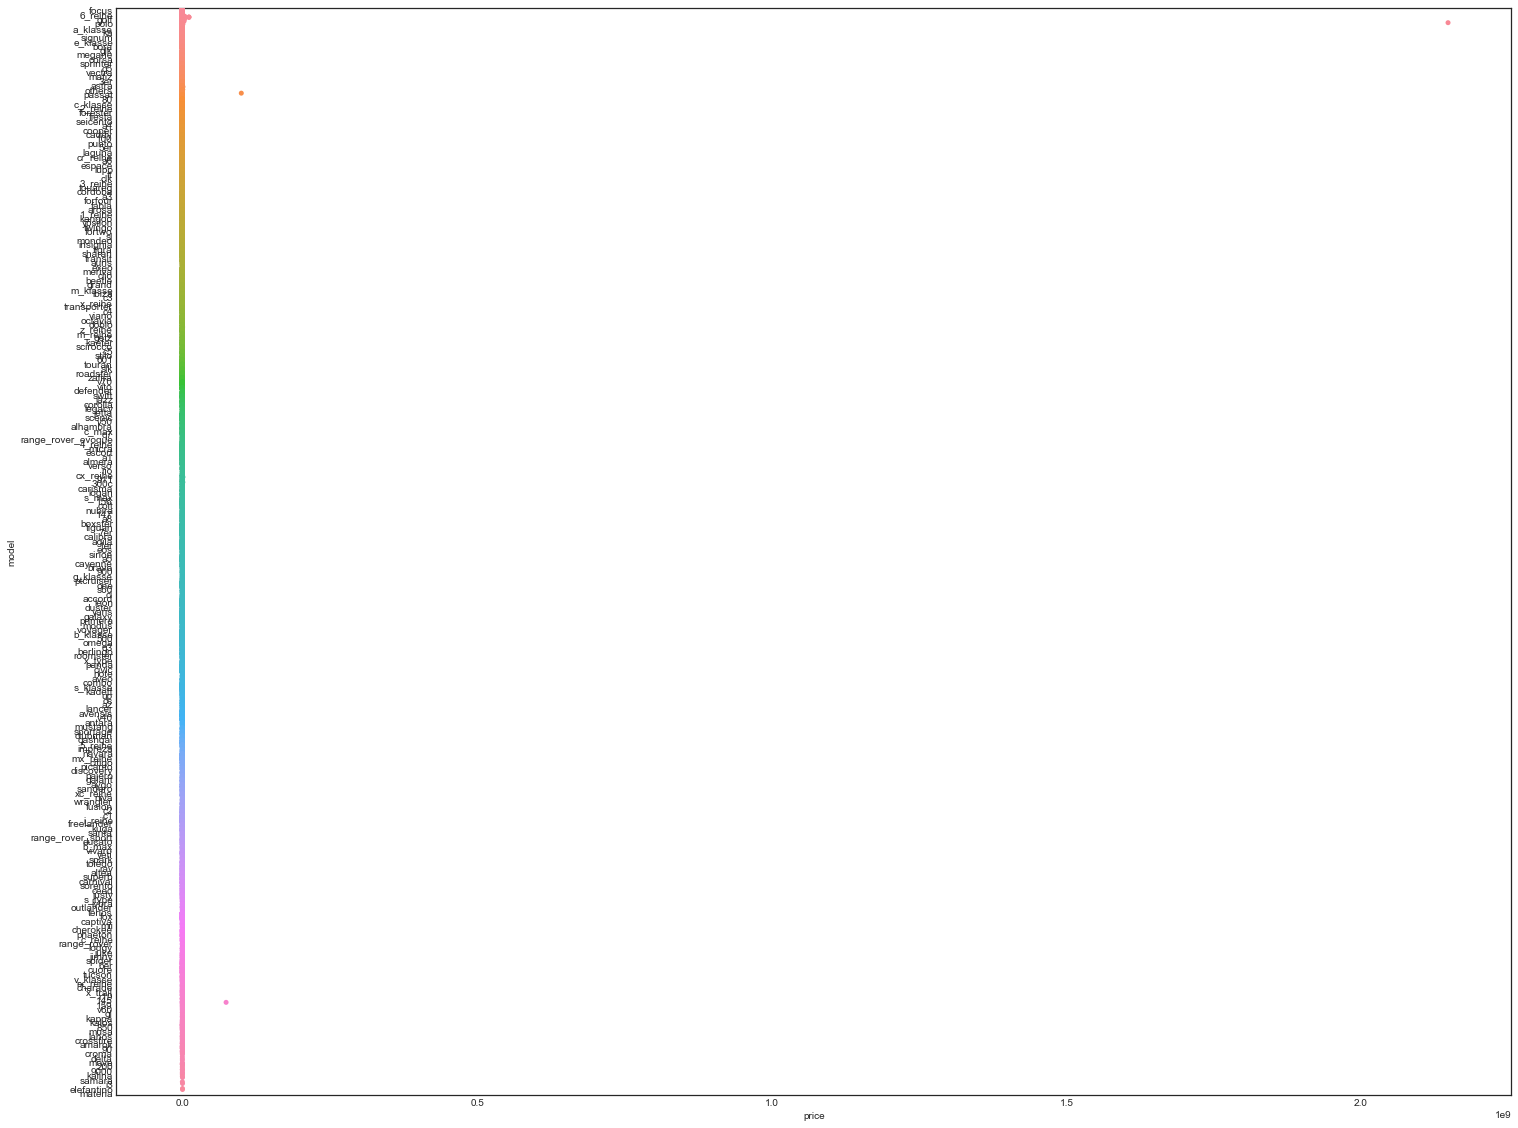

In [18]:
f, ax = plt.subplots(figsize=(25, 20))
sns.stripplot(data = df, x='price', y='model', jitter=.9)
plt.show()

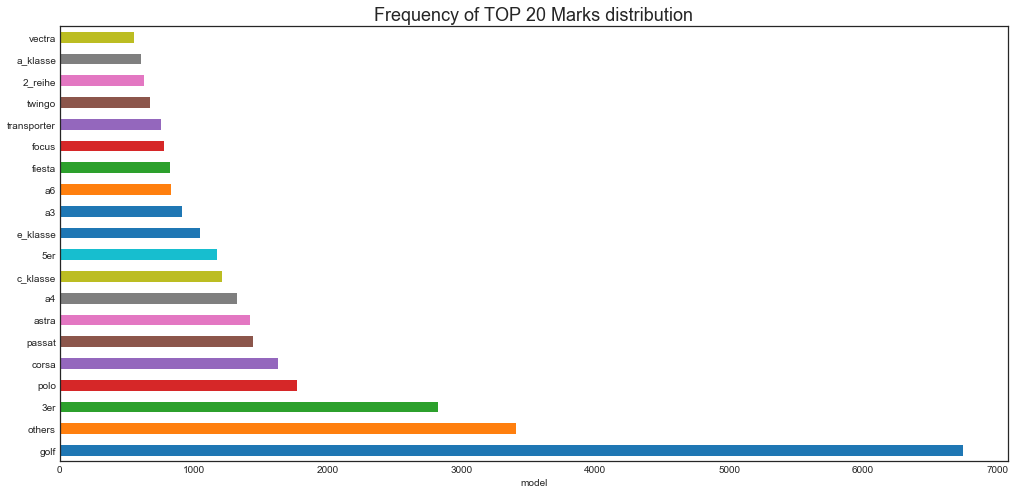

In [23]:
plt.figure(figsize=(17,8))
df.model.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('model')
plt.title("Frequency of TOP 20 Marks distribution",fontsize=18)
plt.show()

In [30]:
df.fuelType.value_counts()

petrol     34389
diesel     14721
lpg          733
cng           73
hybrid        43
other         26
electro       15
Name: fuelType, dtype: int64

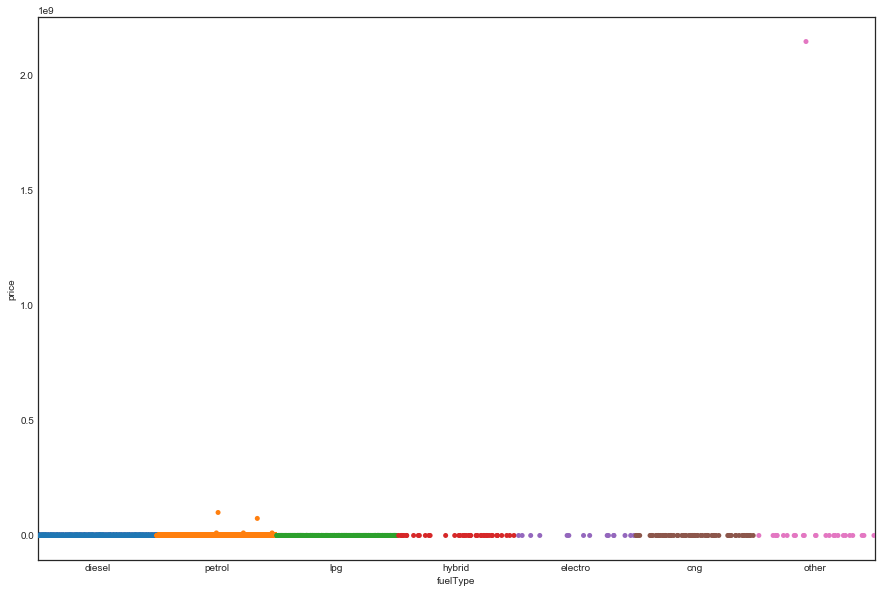

In [24]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='fuelType', y='price', jitter=.5)
plt.show()

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

C:\Users\MANEESH\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


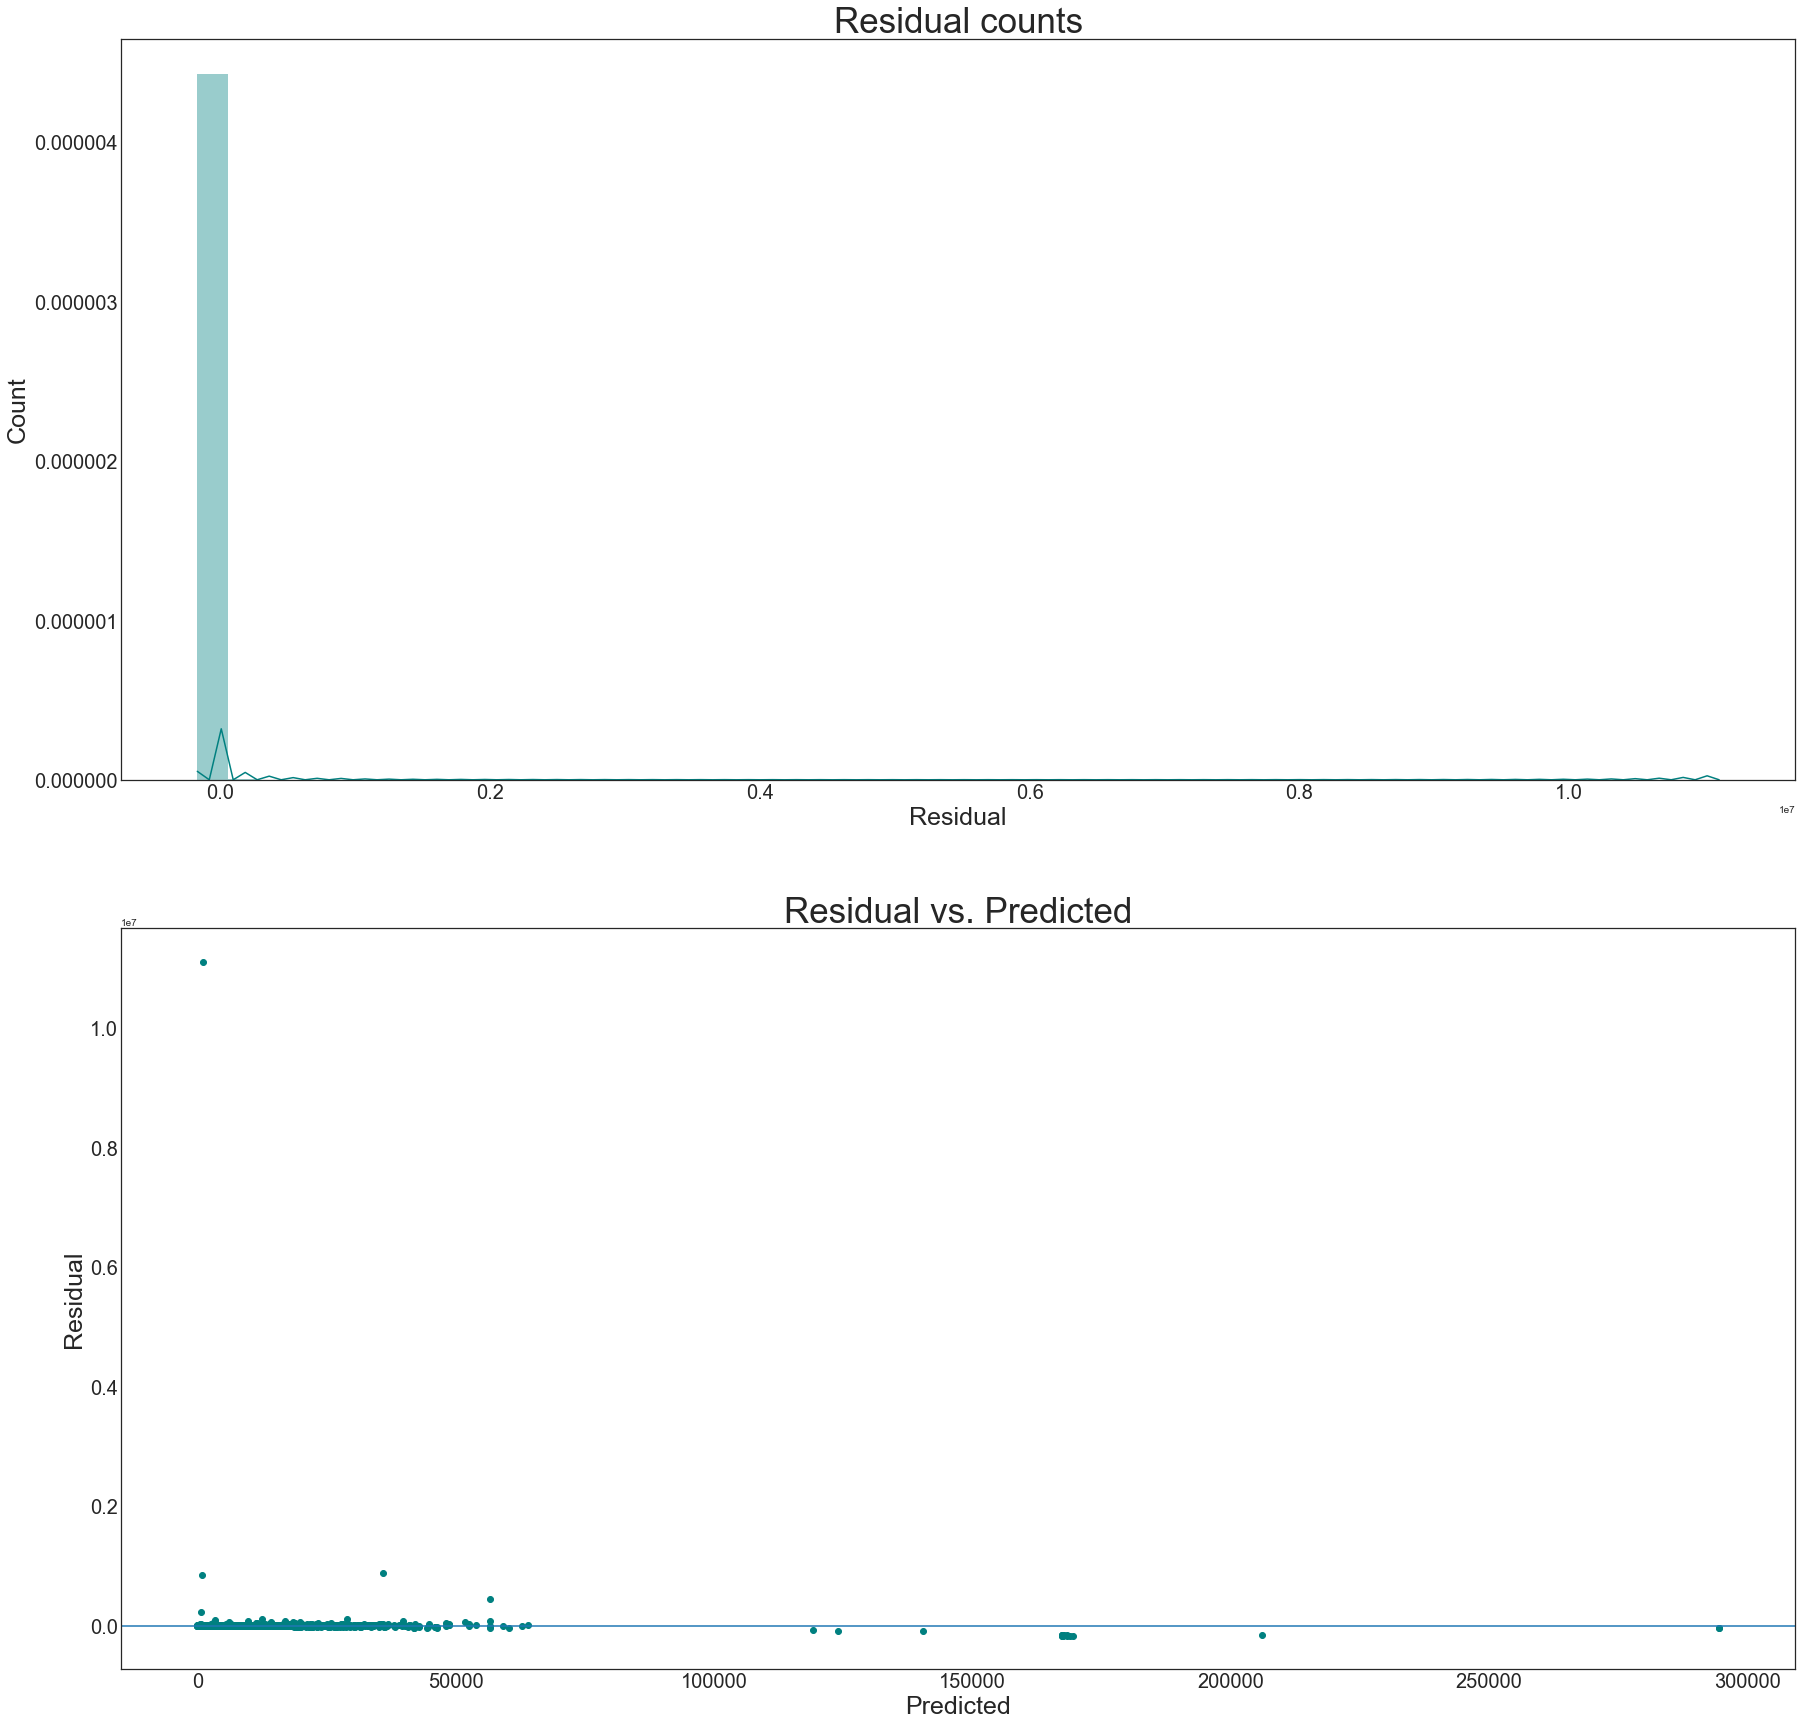

RMSE:
112137.23358862441


In [72]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [73]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.00


C:\Users\MANEESH\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


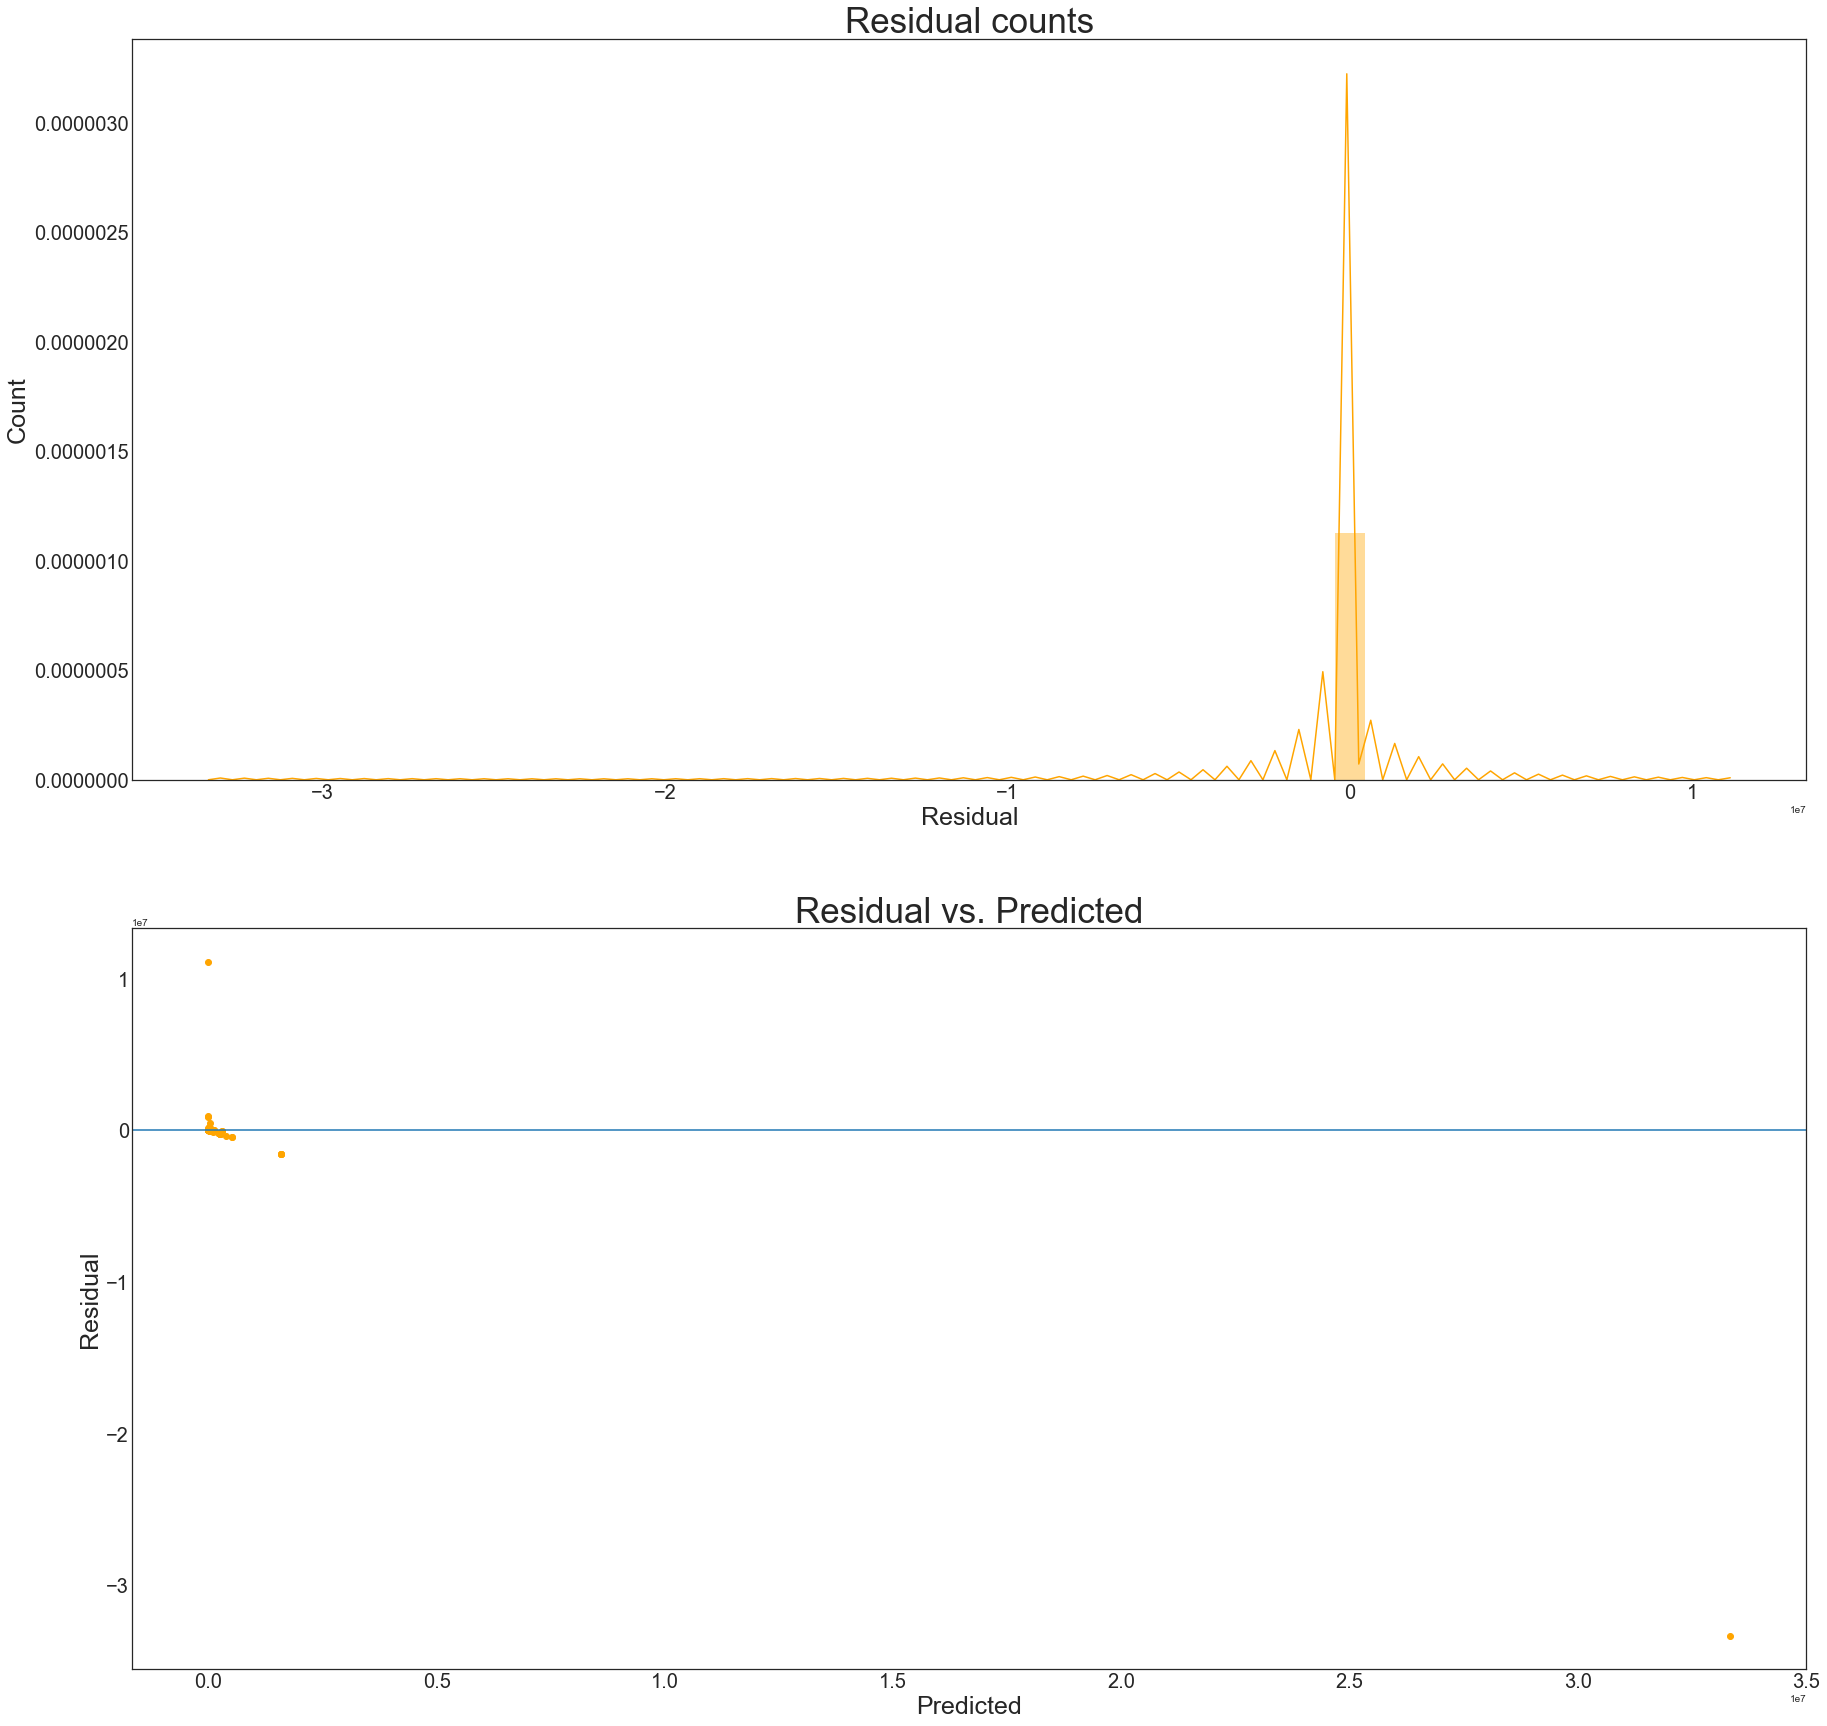

RMSE:
353170.61912497866


In [74]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [75]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: -8.90


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())

In [ ]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

In [ ]:
gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [ ]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))